In [1]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path
import tensorflow as tf
print('TensorFlow Version: ', tf.__version__)

np.random.seed(123)

TensorFlow Version:  2.1.0


In [2]:
def load_metadata(filename):
    with open(filename, 'r') as f:
        return [x.strip().split('\t') for x in f.readlines()]

In [3]:
# TODO: Update this so it's not hardcoded. For prelim results, just moving quickly
interested_categories = ['n01882714', 'n04562935']

# NOTE: We can only use the training data for this since we're assuming an imbalanced input set.
interested_data = [x for x in load_metadata('./metadata_output/train_metadata.txt') if x[1] in interested_categories]

In [4]:
def find_representatives(images, num_representatives=5):
    candidates = np.arange(len(images))
    np.random.shuffle(candidates)
    return candidates[:num_representatives]

In [5]:
def plot_representatives(images, representatives):
    # Show representative images
    for i in representatives:
        plt.imshow(images[i])
        plt.show()

In [6]:
def save_representatives(cat, images, representatives):
    if not os.path.exists(os.path.join('representative_data', cat)):
        os.makedirs(os.path.join('representative_data', cat))
    for i in representatives:
        filename = os.path.join('representative_data', cat, '{}.jpg'.format(i))
        print('Saving to: {}'.format(filename))
        cv2.imwrite(filename, images[i] * 255.)

Representative images for category: n01882714


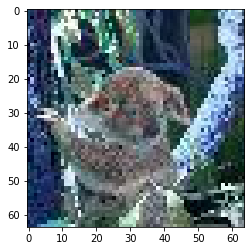

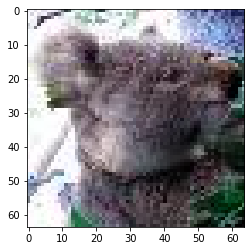

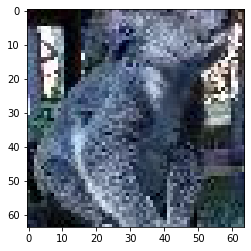

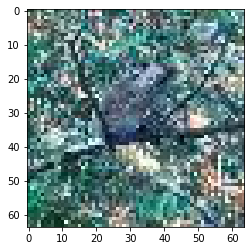

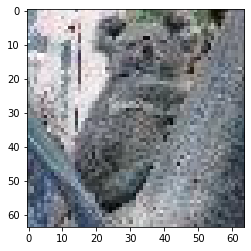

Saving representatives...
Saving to: representative_data/n01882714/141.jpg
Saving to: representative_data/n01882714/91.jpg
Saving to: representative_data/n01882714/86.jpg
Saving to: representative_data/n01882714/138.jpg
Saving to: representative_data/n01882714/33.jpg
Done
Representative images for category: n04562935


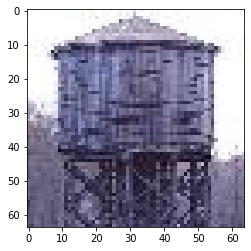

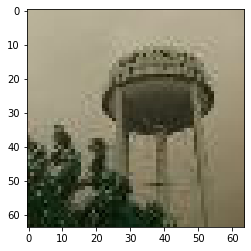

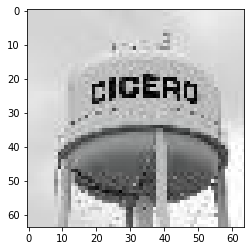

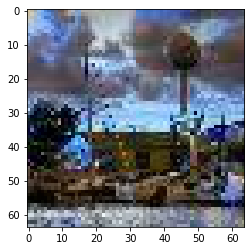

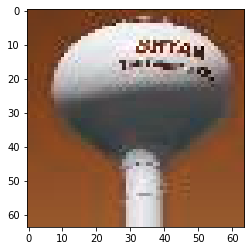

Saving representatives...
Saving to: representative_data/n04562935/158.jpg
Saving to: representative_data/n04562935/11.jpg
Saving to: representative_data/n04562935/64.jpg
Saving to: representative_data/n04562935/113.jpg
Saving to: representative_data/n04562935/166.jpg
Done


In [7]:
for cat in interested_categories:
    cat_data = [x[0] for x in interested_data if x[1] == cat]
    # Read tiny imagenet metadata (start with small subset)
    images = np.array([cv2.resize(cv2.imread(x), (64, 64)) for x in cat_data]) / 255.
    representatives = find_representatives(images)
    print('Representative images for category: {}'.format(cat))
    plot_representatives(images, representatives)
    print('Saving representatives...')
    save_representatives(cat, images, representatives)
    print('Done')